Make Path

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import operator
import numpy as np
from time import sleep
import pandas as pd
import random
import geopandas as gpd
from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

## Part 1 : Graph handling
Find a simple graph using lat and lon,  
change color of one of the edges,   
see how osmnx handles edges and weights

In [2]:
class city(object):
    def __init__(self, lat,lon,size,network_type):
        self.graph = ox.graph_from_point((lat, lon), dist=size, network_type=network_type)
#         fig = plt.figure()
        fig, ax = ox.plot_graph(self.graph,node_color='w',node_edgecolor='w',node_size=40, 
                      node_zorder=3, edge_color='w', edge_linewidth=2, close=True,bgcolor = 'midnightblue')
    def make_two_way_streets(self):
        print("starting len", len(list(self.graph.edges(keys=False))))
        # edge = (123412341234123,12341234123412341)
        # G.add_edge(*edge)
        remove_edges = []
        for key,value,n in self.graph.edges(keys=True):
            if n > 0:
                remove_edges.append((key,value))
        self.graph.remove_edges_from(remove_edges)
        counter = 0
        for edge in self.graph.edges(keys=False):
            if (edge[1],edge[0]) not in san_fran.graph.edges:
                edge_to_add = (edge[1],edge[0])
                san_fran.graph.add_edge(*edge_to_add, 
                           length = self.graph.edges[(edge[0],edge[1],0)]['length'], 
                           highway = self.graph.edges[(edge[0],edge[1],0)]['highway'],
                           osmid = self.graph.edges[(edge[0],edge[1],0)]['osmid'],
                           oneway = self.graph.edges[(edge[0],edge[1],0)]['oneway']
                          )
        print("ending len",len(list(self.graph.edges(keys=True))))

# san_fran = city(lat = 37.79, lon = -122.41, size=300, network_type='drive')      
# san_fran.make_two_way_streets()

# keep incase everything breaks 
# G = ox.graph_from_point((37.79, -122.41), dist=300, network_type='drive')
# G.edge_color = "r"
# #G.edges[(65295299, 65352435, 0)]
# #(65295299, 4018840072, 0)
# # fig, ax = ox.plot_graph(G,node_color='b',node_edgecolor='w',node_size=30, 
#               # node_zorder=3, edge_color="w", edge_linewidth=2)
# #ox.plot_graph(G,node_color='b',node_edgecolor='w',node_size=30, node_zorder=3, edge_color="w", edge_linewidth=2)
# color_nodes = [65295299, 65352435, 6319217969, 4018840072]
# ec = []
# for start, end in G.edges(keys=False):
#     if (end in color_nodes and start==65295299):
#         ec.append('r')
#     elif (start in color_nodes and end==65295299):
#         ec.append('r')
#     else:
#         ec.append('w')
# #ec = ['r' if (start in color_nodes and end==65295299) else 'w' if (end in color_nodes and start==65295299) else 'w' for start, end in G.edges(keys=False)]
# #ec = ['r' if (start in color_nodes and end==65295299) else 'w' for start, end in G.edges(keys=False)]
# nc = ['r' if (n in color_nodes) else 'b' for n in G.nodes]
# # ants = ox.graph_from_point((37.79, -122.41), dist=300, network_type='drive')
# fig = plt.figure()
# fig, ax = ox.plot_graph(G,node_color=nc,node_edgecolor='w',node_size=40, 
#               node_zorder=3, edge_color=ec, edge_linewidth=2, close=True,bgcolor = 'midnightblue')

### Playing with multiDgraph edge format

In [4]:
# print(list(san_fran.graph.edges(keys=False)))
# print(san_fran.graph.edges[(65295299, 65352435, 0)])
# print(san_fran.graph.edges[(65303544,6319217960, 0)])
# print()
# print(san_fran.graph.edges[(6319217960, 65303544, 0)])
# ox.get_nearest_edge(san_fran.graph, (65295299, 65352435), return_geom=False, return_dist=False)
# ox.distance.get_nearest_node(san_fran.graph, (65295299, 65352435), method='haversine', return_dist=False)


### Part A hex colors gradients

In [5]:
# hex color gradient for red


### Part 1.b Make food pheromone class
Class will hold all pheromone amounts for graph, each ant is given same food class  
Functions =  
    **add_pheromone** - add 10 pheromones to edge  
    **decay_pheromone** - take 1 pheromone away from each edge  
    **edge_weight** - return pheromone amount  
    **update_graph_edge** - plot a new graph of edges with new concentrations, and uodates discovered nodes then changes those node colors  

In [12]:
class food_pheromone(object):
    def __init__(self, graph, pheromone):
        self.graph = graph # sent original osmnx graph
        self.pheromone = pheromone # empty dict to hold pheromone concentraions for edges
        self.discovered_nodes = []
        self.ec = ['w' for i in range(len(self.graph.edges()))] # edge colors
        self.nc = ['b' for i in range(len(self.graph.nodes()))] # node colors
        self.food_source = []
    def add_pheromone(self, edge, release_amount):
        # add 10 to edge weight
        self.pheromone[edge] += release_amount
        self.pheromone[(edge[1],edge[0])] += release_amount
        
    def decay_pheromone(self,amount):
        # decay each edge closer to 0
        for key,value in self.pheromone.items():
            if value > 0: 
                self.pheromone[key] -= amount
                self.pheromone[(key[0],key[1])] -= amount
    def edge_weight(self, edge):
        # return edge concentraion weight
        return self.pheromone[edge]
    def update_graph_edge(self, pheromone_release): # change color intensity of edge w/relation to pheromone concentration
        # i need a list where each edge is a certain hex color
        ec = []
        for start, end in self.graph.edges(keys=False):
            try:
                if (self.pheromone[(start,end)] > 0):
                    if (self.pheromone[(start,end)] == pheromone_release):
                        ec.append('r')
                    elif (self.pheromone[(start,end)] == pheromone_release**2):
                        ec.append('g')
                    elif (self.pheromone[(start,end)] == pheromone_release**3):
                        ec.append('orange')
                    else:
                        ec.append('b')
                elif (self.pheromone[(end,start)] > 0):
                    ec.append('r')
                else:
                    ec.append('w')
            except:
                ec.append('w')
        self.ec = ec
        self.nc = ['r' if (n in self.discovered_nodes and not self.is_food_source(n)) else '' 'g' if (self.is_food_source(n)) else 'b' for n in self.graph.nodes]
        
#         fig , ax = ox.plot_graph(self.graph,node_color=self.nc,node_edgecolor='w',node_size=30, 
#               node_zorder=3, edge_color=self.ec, edge_linewidth=2)
        fig = plt.figure()
        fig, ax = ox.plot_graph(self.graph,node_color=self.nc,node_edgecolor='w',node_size=40, 
              node_zorder=3, edge_color=self.ec, edge_linewidth=2, close=True,bgcolor = 'midnightblue')
        
    def add_discovered_node(self,node):
        self.discovered_nodes.append(node)
        
    def make_food_source(self, location):
        self.food_source.append(location)
    
    def print_food_sources(self):
        print("There are food sources here:", self.food_source)
    
    def is_food_source(self,location):
        if location in self.food_source:
            return True

        
# food_concentrations = dict.fromkeys(san_fran.graph.edges(), 0)
# food = food_pheromone(san_fran.graph, food_concentrations)

# food.make_food_source(6319217971)
# food.print_food_sources()
# food.is_food_source(6319217971)

# food.add_discovered_node(65295299)
# food.add_pheromone((65295299, 65352435))
# food.add_discovered_node(65352435)
# food.update_graph_edge()
# food.add_pheromone((65352435, 65319940))
# food.add_discovered_node(65319940)
# food.update_graph_edge()
# food.add_pheromone((65319940, 6319217971))
# food.add_discovered_node(6319217971)
# food.update_graph_edge()


# food.decay_pheromone(1)

#food.update_graph_node()


# food.add_discovered_node(6319217969)
# food.add_discovered_node(4018840072)
# food.add_discovered_node(552853367)
# food.add_discovered_node(65352435)
# food.add_discovered_node(65319940)
# food.add_discovered_node(3406604945)



## Part 2 : Make one ant
#### Functions: 
**init** - start ant at nest location, send graph, food pheromone concentrations  
**move** - while loop, since each ant runs forever from nest to food and back, since we start at the nest/node it calls path_choice to choose where to go with available options, cant go from where it came from !! unless its a dead end !! need to add that case  
**path_choice_from_node** - choose highest concnetration but need to add the correct equation and randomness/threshold so we can make an established path  
**walk along edge** - walk along the path for the distance of the road/path, drop pheromones only once !! need to call decay on global scale, not have the ant control it

In [17]:
class ant_agent(object):
    def __init__(self, graph, nest, food, pheromone_release, name):
        self.location = nest # random node from graph above
        self.graph = graph
        self.nest = nest
        self.food = food
        self.has_food = False
        self.previous_node = nest
        self.pheromone_release = pheromone_release
        food.add_discovered_node(nest)
        self.name = name
    def move(self):
#         while (not self.has_food):
        for _ in range(5):
            if isinstance(self.location,int):
                print("My name is: ", self.name)
                # in a node make a decision
                edge_choice = self.scout_food_from_node()
                self.location = edge_choice
#                 print("on edge",edge_choice)
                
                self.previous_node = edge_choice[0]
#                 print("previous node", self.previous_node)
                
                node_choice = self.walk_along_edge(edge_choice)
                self.location = node_choice
#                 print("at node", self.location)
                food.add_discovered_node(self.location)
                if food.is_food_source(self.location):
                    self.has_food = False
#                     print("AT FOOD SOURCE GO HOME NOW")
                
                self.food.update_graph_edge(self.pheromone_release)
                
                # check if it has food and start going back to the nest
                
            else:
                print("Invalid Location")
        while (self.has_food):
            #return home based off of higher pheromones and then random if no pheromones on trail
            
            
            
            if self.location == self.nest:
                self.has_food = False
        
    def scout_food_from_node(self):
        # caculate probabilites of going in each direction, except the way we came
        # NEED to include that the edges are one way so we need them to be able to go both ways down any path even if its not on the graph
        # return node to travel to
        #print(self.location)
        options = [(start, end) for start, end in self.graph.edges(keys=False) if (start==self.location)]
        options = dict.fromkeys(options, 0)
        for key,value in options.items(): # add pheromone weights to each possible path
            options[key] = self.food.edge_weight(key)
            
#         print(options)
        
        if (len(options.items()) == 1): # if only way is back the way we came then go that way
            return list(options.keys())[0]
        
        try: # delete path it came from for now
            del options[(self.location,self.previous_node)]
            del options[(self.previous_node,self.locatoin)]
        except:
            None        
        
        ## all new paths
        all_new = len(list(set(list(options.values())))) == 1
        if all_new:
            key = random.choice(list(options.keys()))
            #print("hey this is random",key)
            return key
        ## dead end go back for another new path
        ## if dead end go to previous node 
        #return (self.location,self.previous_node)
        ## return highest pheromoone concentraion
        
        return max(options.items(), key=operator.itemgetter(1))[0]
    
    def walk_along_edge(self, edge):
        # take time to walk along given edge based on how long it is
        #print("loooking at length", edge[0],edge[1])
        length = (self.graph.edges[(edge[0],edge[1],0)]['length'])
        # take s10 steps then drop pheromone
        self.food.add_pheromone(edge, self.pheromone_release) # add pheromone
        while(length > 0):
            length -= 1
            sleep(0.01)
        return edge[1]

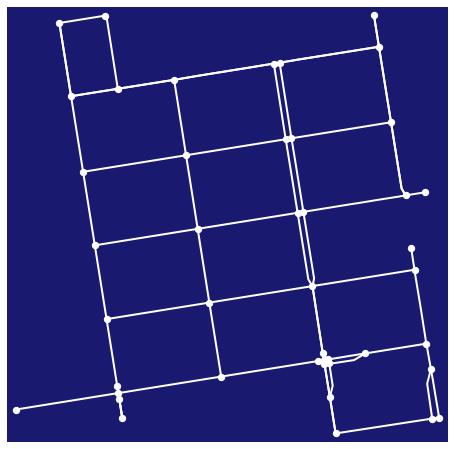

starting len 85
ending len 130
My name is:  alice


<Figure size 432x288 with 0 Axes>

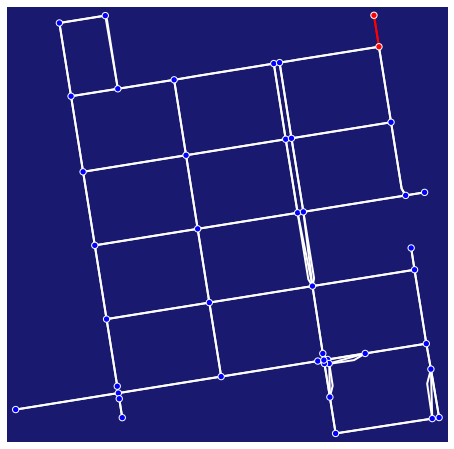

My name is:  alice


<Figure size 432x288 with 0 Axes>

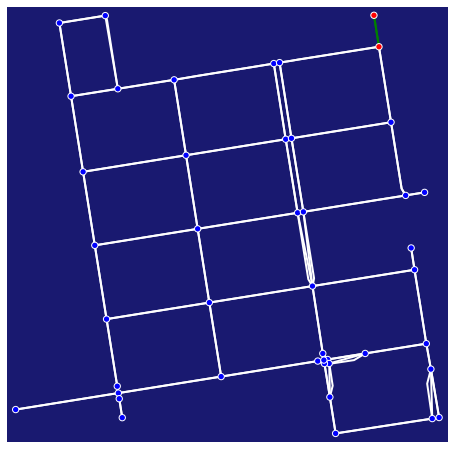

My name is:  alice


<Figure size 432x288 with 0 Axes>

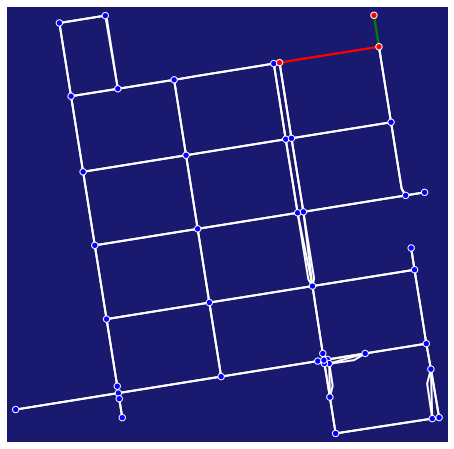

My name is:  alice


<Figure size 432x288 with 0 Axes>

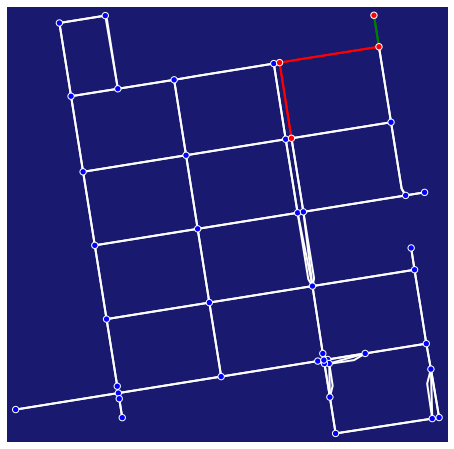

My name is:  alice


<Figure size 432x288 with 0 Axes>

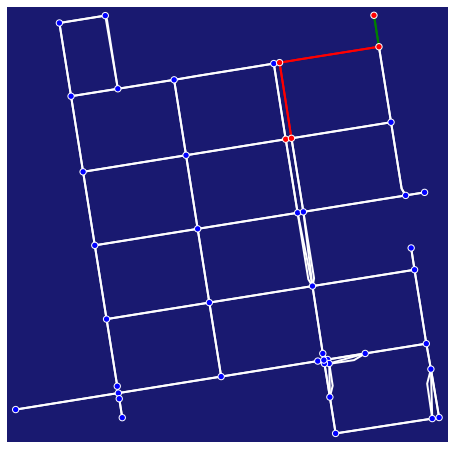

My name is:  bob


<Figure size 432x288 with 0 Axes>

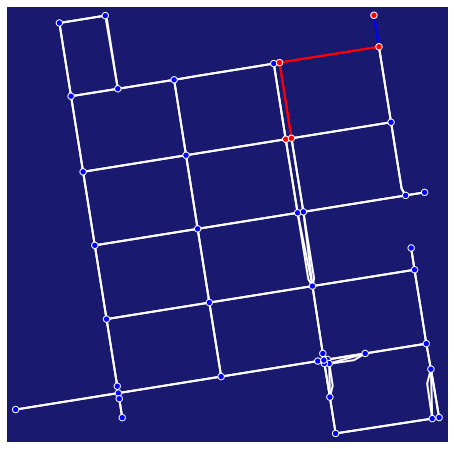

My name is:  bob


<Figure size 432x288 with 0 Axes>

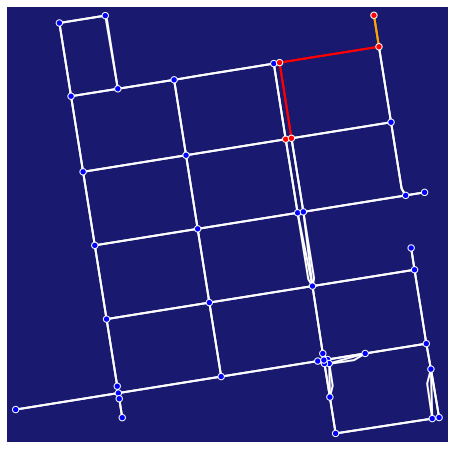

My name is:  bob


<Figure size 432x288 with 0 Axes>

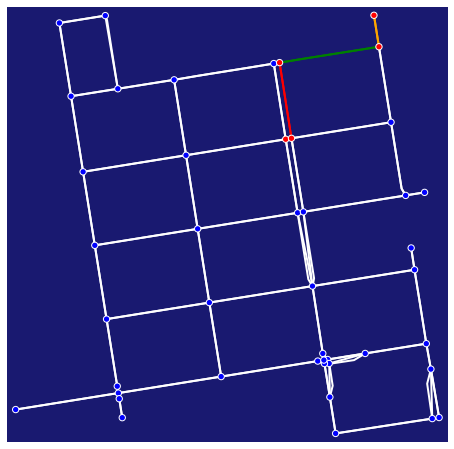

My name is:  bob


<Figure size 432x288 with 0 Axes>

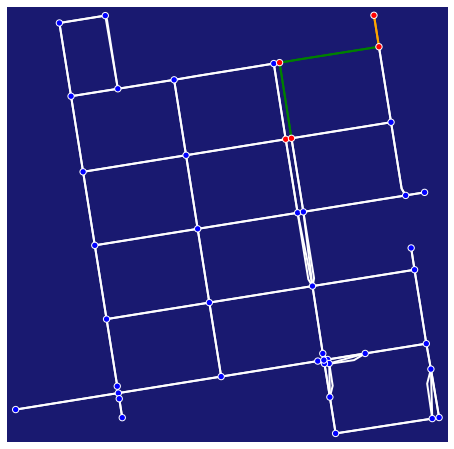

My name is:  bob


<Figure size 432x288 with 0 Axes>

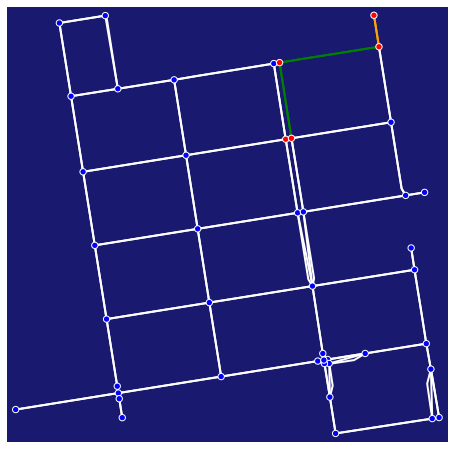

In [18]:
nest = 65295299
pheromone_release = 2
# food.add_pheromone((65319940, 6319217971))
# print(food.edge_weight((65319940, 6319217971)))

# food.make_food_source(65352435)
# food.make_food_source(6319217969)
# food.make_food_source(4018840072)

san_fran = city(lat = 37.79, lon = -122.41, size=300, network_type='drive')      
san_fran.make_two_way_streets()

food_concentrations = dict.fromkeys(san_fran.graph.edges(), 0)
food = food_pheromone(san_fran.graph, food_concentrations)

alice = ant_agent(san_fran.graph, nest, food, pheromone_release, name = 'alice')
alice.move()
bob = ant_agent(san_fran.graph, nest, food, pheromone_release, name = 'bob')
bob.move()
## threads I want running at the same time are multiple ant agents and the food class
## I also want then all to access the graph class data

In [9]:
## Decay program
decay_amount = 1
while(1):
    food.decay_pheromone(1)
    

KeyboardInterrupt: 

## Next:
### make a food node
### make a parellel running decay program while ant is live
### make phermone dict exclusive access, an ant cant access the dict at the same time as decay (or can it) will it mess up the values?
### fix dead end problem but not allow the ant to go back home without food, like depth first search with randomness for unexplored area
### don't keep adding pheromones, only once then walk the path or concentraion will be inflated

## Part 5: Add nest and food objectives
## Part 6: Simulate one ant agent
## Part 7: Update this part